### Problem Statement:
Air pollution is a severe public health concern worldwide, with adverse effects on human health and the environment. Although air quality monitoring systems are in place, they lack the capability to predict future air quality accurately. Hence, 
- #### We need to develop a machine learning-based approach that can predict air quality for a given location and time frame and provide insights to improve public health and the environment.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings("ignore") 
import os
import seaborn as sns
from sklearn.impute import KNNImputer

In [4]:
csv_files=glob.glob('*.{}'.format('csv'))

In [5]:
csv_files

['airport.csv',
 'bandra_kurla.csv',
 'bandra_mumbai.csv',
 'deonar.csv',
 'kurla.csv',
 'malad.csv',
 'mazagaon.csv',
 'worli.csv']

#### Calculate AQI

#### - Source : 
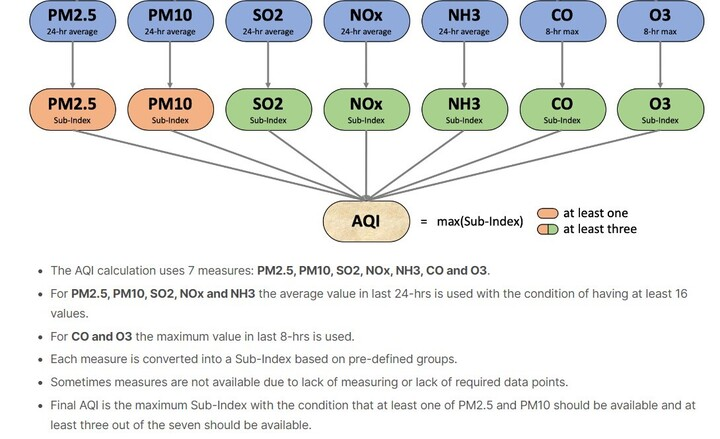

In [7]:
def avg_no(df):
## Rolling avg for pollutants

    df["PM10_24hr_avg"] = df.groupby("station")["PM10"].rolling(window = 24, min_periods = 16).mean().values
    df["PM2.5_24hr_avg"] = df.groupby("station")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
    df["SO2_24hr_avg"] = df.groupby("station")["SO2"].rolling(window = 24, min_periods = 16).mean().values
    df["NOx_24hr_avg"] = df.groupby("station")["NOx"].rolling(window = 24, min_periods = 16).mean().values
    df["NH3_24hr_avg"] = df.groupby("station")["NH3"].rolling(window = 24, min_periods = 16).mean().values
    df["CO_8hr_max"] = df.groupby("station")["CO"].rolling(window = 8, min_periods = 1).max().values
    df["Ozone_8hr_max"] = df.groupby("station")["Ozone"].rolling(window = 8, min_periods = 1).max().values
    
    return df

In [8]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

#     df["PM2.5_μg"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))


## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

#     df["PM10_μg"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

#     df["SO2_μg"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

#     df["NOx_μg"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))


## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

#     df["NH3_μg"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

#     df["CO_μg"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

## O3 Sub-Index calculation
def get_Ozone_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

#     df["Ozone_μg"] = df["Ozone_8hr_max"].apply(lambda x: get_Ozone_subindex(x))

## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

    
#     df["Checks"] = (df["PM2.5_μg"] > 0).astype(int) + \
#                     (df["PM10_μg"] > 0).astype(int) + \
#                     (df["SO2_μg"] > 0).astype(int) + \
#                     (df["NOx_μg"] > 0).astype(int) + \
#                     (df["NH3_μg"] > 0).astype(int) + \
#                     (df["CO_μg"] > 0).astype(int) + \
#                     (df["Ozone_μg"] > 0).astype(int)

#     df["AQI_calculated"] = round(df[["PM2.5_μg", "PM10_μg", "SO2_μg", "NOx_μg",
#                                      "NH3_μg", "CO_μg", "Ozone_μg"]].max(axis = 1))
#     df.loc[df["PM2.5_μg"] + df["PM10_μg"] <= 0, "AQI_calculated"] = np.NaN
#     df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

#     df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
#     df[~df.AQI_calculated.isna()].head(10)



#### KNN Imputation for Missing values

In [9]:
def knn_imputing(df):

    clms_to_knn=['PM2.5', 'PM10', 'NO', 'NO2',
                 'NOx', 'NH3', 'SO2', 'CO', 'Ozone','Benzene','WS','WD','TOT-RF']
    
    df[clms_to_knn] = df[clms_to_knn].apply(pd.to_numeric, errors='coerce', axis=1)

    imputer = KNNImputer(n_neighbors=5, weights='uniform')
    df = pd.DataFrame(imputer.fit_transform(df), columns = clms_to_knn)
    
    return df

In [10]:
def date_column(df):    
    df = df.rename(columns={'From Date': 'date_1'}) # Rename date column
    df = df.rename(columns={'To Date': 'date_2'}) # Rename date column
    df["date_1"] = pd.to_datetime(df.date_1, format='%d-%m-%Y %H:%M') # Format Date column as datetime
    df["date_2"] = pd.to_datetime(df.date_2, format='%d-%m-%Y %H:%M') # Format Date column as datetime
    return df

In [11]:
clms_to_knn=['PM2.5', 'PM10', 'NO', 'NO2',
             'NOx', 'NH3', 'SO2', 'CO', 'Ozone','Benzene','WS','WD','TOT-RF']

### Station wise AQI 

#### 1. Airport

In [13]:
df_airport=pd.read_csv('airport.csv')
df_airport = date_column(df_airport)
df_airport['station'] = 'airport'
df_date=df_airport[['date_1','date_2','station']]
df_airport_1=df_airport[clms_to_knn]
df_airport_1=knn_imputing(df_airport_1)
df_airport_1.isnull().sum()
df_airport = pd.concat([df_date, df_airport_1], axis=1)

In [14]:
df_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76321 entries, 0 to 76320
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date_1   76321 non-null  datetime64[ns]
 1   date_2   76321 non-null  datetime64[ns]
 2   station  76321 non-null  object        
 3   PM2.5    76321 non-null  float64       
 4   PM10     76321 non-null  float64       
 5   NO       76321 non-null  float64       
 6   NO2      76321 non-null  float64       
 7   NOx      76321 non-null  float64       
 8   NH3      76321 non-null  float64       
 9   SO2      76321 non-null  float64       
 10  CO       76321 non-null  float64       
 11  Ozone    76321 non-null  float64       
 12  Benzene  76321 non-null  float64       
 13  WS       76321 non-null  float64       
 14  WD       76321 non-null  float64       
 15  TOT-RF   76321 non-null  float64       
dtypes: datetime64[ns](2), float64(13), object(1)
memory usage: 9.3+ MB


In [15]:
df_airport = avg_no(df_airport)

In [16]:
df_airport["PM2.5_μg"] = df_airport["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
df_airport["PM10_μg"] = df_airport["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))
df_airport["SO2_μg"] = df_airport["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))
df_airport["NOx_μg"] = df_airport["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))
df_airport["NH3_μg"] = df_airport["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))
df_airport["Ozone_μg"] = df_airport["Ozone_8hr_max"].apply(lambda x: get_Ozone_subindex(x))
df_airport["CO_μg"] = df_airport["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))
df_airport["Checks"] = (df_airport["PM2.5_μg"] > 0).astype(int) + \
                (df_airport["PM10_μg"] > 0).astype(int) + \
                (df_airport["SO2_μg"] > 0).astype(int) + \
                (df_airport["NOx_μg"] > 0).astype(int) + \
                (df_airport["NH3_μg"] > 0).astype(int) + \
                (df_airport["CO_μg"] > 0).astype(int) + \
                (df_airport["Ozone_μg"] > 0).astype(int)

df_airport["AQI_calculated"] = round(df_airport[["PM2.5_μg", "PM10_μg", "SO2_μg", "NOx_μg",
                                 "NH3_μg", "CO_μg", "Ozone_μg"]].max(axis = 1))
df_airport.loc[df_airport["PM2.5_μg"] + df_airport["PM10_μg"] <= 0, "AQI_calculated"] = np.NaN
df_airport.loc[df_airport.Checks < 3, "AQI_calculated"] = np.NaN

df_airport["AQI_bucket_calculated"] = df_airport["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

In [17]:
df_airport=df_airport.fillna(value=0)
df_airport.info()
df_airport.columns
df_airport.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76321 entries, 0 to 76320
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_1                 76321 non-null  datetime64[ns]
 1   date_2                 76321 non-null  datetime64[ns]
 2   station                76321 non-null  object        
 3   PM2.5                  76321 non-null  float64       
 4   PM10                   76321 non-null  float64       
 5   NO                     76321 non-null  float64       
 6   NO2                    76321 non-null  float64       
 7   NOx                    76321 non-null  float64       
 8   NH3                    76321 non-null  float64       
 9   SO2                    76321 non-null  float64       
 10  CO                     76321 non-null  float64       
 11  Ozone                  76321 non-null  float64       
 12  Benzene                76321 non-null  float64       
 13  W

date_1                   0
date_2                   0
station                  0
PM2.5                    0
PM10                     0
NO                       0
NO2                      0
NOx                      0
NH3                      0
SO2                      0
CO                       0
Ozone                    0
Benzene                  0
WS                       0
WD                       0
TOT-RF                   0
PM10_24hr_avg            0
PM2.5_24hr_avg           0
SO2_24hr_avg             0
NOx_24hr_avg             0
NH3_24hr_avg             0
CO_8hr_max               0
Ozone_8hr_max            0
PM2.5_μg                 0
PM10_μg                  0
SO2_μg                   0
NOx_μg                   0
NH3_μg                   0
Ozone_μg                 0
CO_μg                    0
Checks                   0
AQI_calculated           0
AQI_bucket_calculated    0
dtype: int64

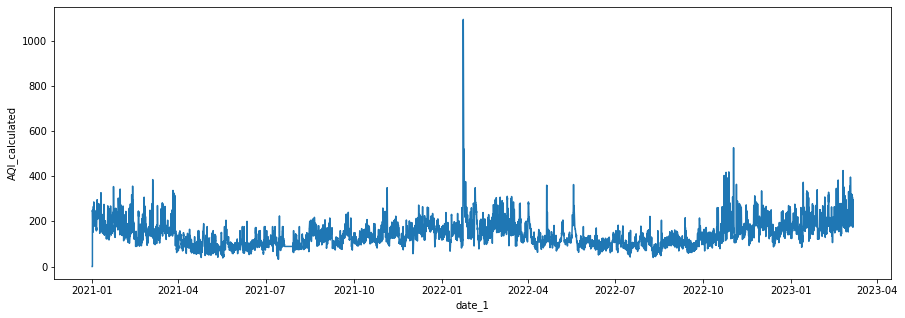

In [23]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_airport)

#### During Lockdown

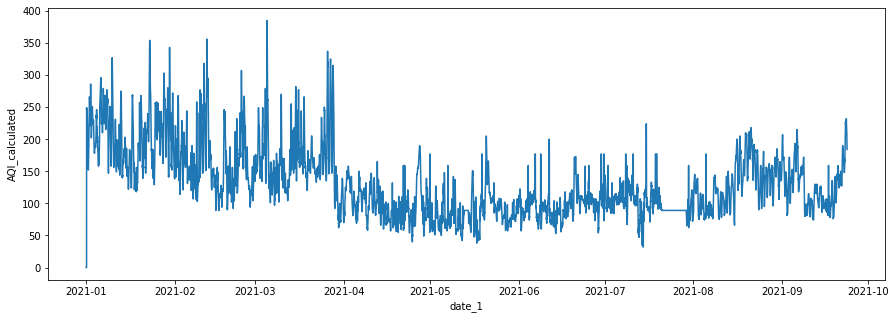

In [98]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_airport[0:25500])

#### After Lockdown AQI

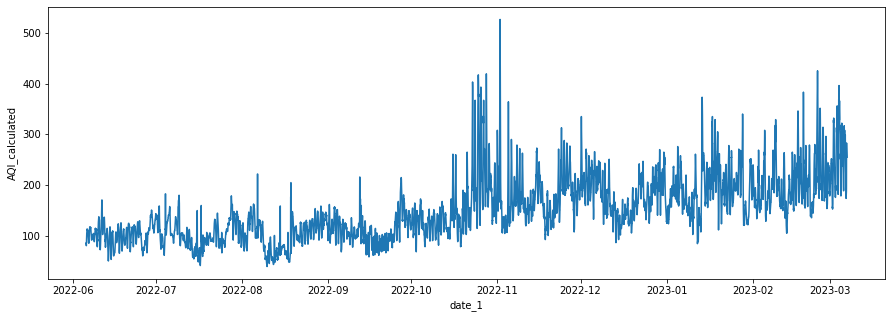

In [103]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_airport[50000:76321])

#### 2. Bandra Kurla

In [24]:
df_bandra_kurla=pd.read_csv('bandra_kurla.csv')

In [25]:
df_bandra_kurla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76475 entries, 0 to 76474
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   76475 non-null  int64  
 1   From Date    76475 non-null  object 
 2   To Date      76475 non-null  object 
 3   PM2.5        76475 non-null  object 
 4   PM10         76475 non-null  object 
 5   NO           76475 non-null  object 
 6   NO2          76475 non-null  object 
 7   NOx          76475 non-null  object 
 8   NH3          76475 non-null  object 
 9   SO2          76475 non-null  object 
 10  CO           76475 non-null  object 
 11  Ozone        76475 non-null  object 
 12  Benzene      76475 non-null  object 
 13  Toluene      76475 non-null  object 
 14  Eth-Benzene  76475 non-null  object 
 15  MP-Xylene    76475 non-null  object 
 16  RH           76475 non-null  object 
 17  WS           76475 non-null  object 
 18  WD           76475 non-null  object 
 19  SR  

In [18]:
df_bandra_kurla=pd.read_csv('bandra_kurla.csv')
df_bandra_kurla = date_column(df_bandra_kurla)
df_bandra_kurla['station'] = 'bandra_kurla'
df_date=df_bandra_kurla[['date_1','date_2','station']]
df_bandra_kurla_1=df_bandra_kurla[clms_to_knn]
df_bandra_kurla_1=knn_imputing(df_bandra_kurla_1)
df_bandra_kurla_1.isnull().sum()
df_bandra_kurla = pd.concat([df_date, df_bandra_kurla_1], axis=1)

In [19]:
df_bandra_kurla = avg_no(df_bandra_kurla)

In [20]:
df_bandra_kurla

,date_1,date_2,station,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,...,WS,WD,TOT-RF,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,Ozone_8hr_max
0,2021-01-01 00:00:00,2021-01-01 00:15:00,bandra_kurla,147.26,175.93,16.23,61.72,45.30,79.76,4.68,...,0.460,187.530,0.0,NaN,NaN,NaN,NaN,NaN,1.38,13.0
1,2021-01-01 00:15:00,2021-01-01 00:30:00,bandra_kurla,145.37,173.96,16.88,61.50,45.75,79.01,18.49,...,0.470,224.110,0.0,NaN,NaN,NaN,NaN,NaN,1.38,15.0
2,2021-01-01 00:30:00,2021-01-01 00:45:00,bandra_kurla,156.71,186.12,22.71,62.99,51.15,84.96,17.62,...,0.460,212.470,0.0,NaN,NaN,NaN,NaN,NaN,1.38,15.0
3,2021-01-01 00:45:00,2021-01-01 01:00:00,bandra_kurla,171.18,205.41,16.55,59.13,44.19,77.83,18.14,...,0.270,216.650,0.0,NaN,NaN,NaN,NaN,NaN,1.38,15.0
4,2021-01-01 01:00:00,2021-01-01 01:15:00,bandra_kurla,183.17,219.31,20.39,59.87,47.66,81.63,18.69,...,0.170,103.120,0.0,NaN,NaN,NaN,NaN,NaN,1.38,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76470,2023-03-08 13:30:00,2023-03-08 13:45:00,bandra_kurla,89.07,187.55,128.94,107.15,163.90,173.35,50.83,...,0.558,346.334,0.0,177.637083,88.644583,58.172083,212.125833,207.014583,0.02,176.0
76471,2023-03-08 13:45:00,2023-03-08 14:00:00,bandra_kurla,93.35,177.91,96.45,105.15,128.26,148.24,43.74,...,0.396,342.422,0.0,177.529167,88.622500,57.198333,210.913333,206.482917,0.00,176.0
76472,2023-03-08 14:00:00,2023-03-08 14:15:00,bandra_kurla,95.64,177.82,118.26,158.14,177.40,179.00,40.37,...,0.712,256.416,0.0,177.362500,89.095000,55.765417,211.240417,207.207083,0.00,192.0
76473,2023-03-08 14:15:00,2023-03-08 14:30:00,bandra_kurla,101.09,175.04,105.69,149.00,163.99,155.00,40.38,...,0.358,205.256,0.0,177.126250,89.484167,54.478750,209.282917,205.813333,0.00,192.0


In [21]:
# df_bandra_kurla = avg_no(df_bandra_kurla)
df_bandra_kurla["PM2.5_μg"] = df_bandra_kurla["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
df_bandra_kurla["PM10_μg"] = df_bandra_kurla["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))
df_bandra_kurla["SO2_μg"] = df_bandra_kurla["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))
df_bandra_kurla["NOx_μg"] = df_bandra_kurla["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))
df_bandra_kurla["NH3_μg"] = df_bandra_kurla["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))
df_bandra_kurla["Ozone_μg"] = df_bandra_kurla["Ozone_8hr_max"].apply(lambda x: get_Ozone_subindex(x))
df_bandra_kurla["CO_μg"] = df_bandra_kurla["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))
df_bandra_kurla["Checks"] = (df_bandra_kurla["PM2.5_μg"] > 0).astype(int) + \
                (df_bandra_kurla["PM10_μg"] > 0).astype(int) + \
                (df_bandra_kurla["SO2_μg"] > 0).astype(int) + \
                (df_bandra_kurla["NOx_μg"] > 0).astype(int) + \
                (df_bandra_kurla["NH3_μg"] > 0).astype(int) + \
                (df_bandra_kurla["CO_μg"] > 0).astype(int) + \
                (df_bandra_kurla["Ozone_μg"] > 0).astype(int)

df_bandra_kurla["AQI_calculated"] = round(df_bandra_kurla[["PM2.5_μg", "PM10_μg", "SO2_μg", "NOx_μg",
                                 "NH3_μg", "CO_μg", "Ozone_μg"]].max(axis = 1))
df_bandra_kurla.loc[df_bandra_kurla["PM2.5_μg"] + df_bandra_kurla["PM10_μg"] <= 0, "AQI_calculated"] = np.NaN
df_bandra_kurla.loc[df_bandra_kurla.Checks < 3, "AQI_calculated"] = np.NaN

df_bandra_kurla["AQI_bucket_calculated"] = df_bandra_kurla["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

In [22]:
df_bandra_kurla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76475 entries, 0 to 76474
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_1                 76475 non-null  datetime64[ns]
 1   date_2                 76475 non-null  datetime64[ns]
 2   station                76475 non-null  object        
 3   PM2.5                  76475 non-null  float64       
 4   PM10                   76475 non-null  float64       
 5   NO                     76475 non-null  float64       
 6   NO2                    76475 non-null  float64       
 7   NOx                    76475 non-null  float64       
 8   NH3                    76475 non-null  float64       
 9   SO2                    76475 non-null  float64       
 10  CO                     76475 non-null  float64       
 11  Ozone                  76475 non-null  float64       
 12  Benzene                76475 non-null  float64       
 13  W

In [23]:
df_bandra_kurla=df_bandra_kurla.fillna(value=0)
df_bandra_kurla.info()
df_bandra_kurla.columns
df_bandra_kurla.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76475 entries, 0 to 76474
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_1                 76475 non-null  datetime64[ns]
 1   date_2                 76475 non-null  datetime64[ns]
 2   station                76475 non-null  object        
 3   PM2.5                  76475 non-null  float64       
 4   PM10                   76475 non-null  float64       
 5   NO                     76475 non-null  float64       
 6   NO2                    76475 non-null  float64       
 7   NOx                    76475 non-null  float64       
 8   NH3                    76475 non-null  float64       
 9   SO2                    76475 non-null  float64       
 10  CO                     76475 non-null  float64       
 11  Ozone                  76475 non-null  float64       
 12  Benzene                76475 non-null  float64       
 13  W

date_1                   0
date_2                   0
station                  0
PM2.5                    0
PM10                     0
NO                       0
NO2                      0
NOx                      0
NH3                      0
SO2                      0
CO                       0
Ozone                    0
Benzene                  0
WS                       0
WD                       0
TOT-RF                   0
PM10_24hr_avg            0
PM2.5_24hr_avg           0
SO2_24hr_avg             0
NOx_24hr_avg             0
NH3_24hr_avg             0
CO_8hr_max               0
Ozone_8hr_max            0
PM2.5_μg                 0
PM10_μg                  0
SO2_μg                   0
NOx_μg                   0
NH3_μg                   0
Ozone_μg                 0
CO_μg                    0
Checks                   0
AQI_calculated           0
AQI_bucket_calculated    0
dtype: int64

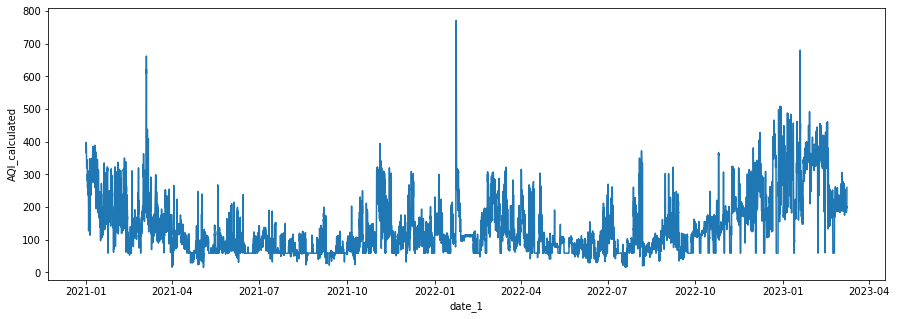

In [134]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_bandra_kurla)

#### During Lockdown

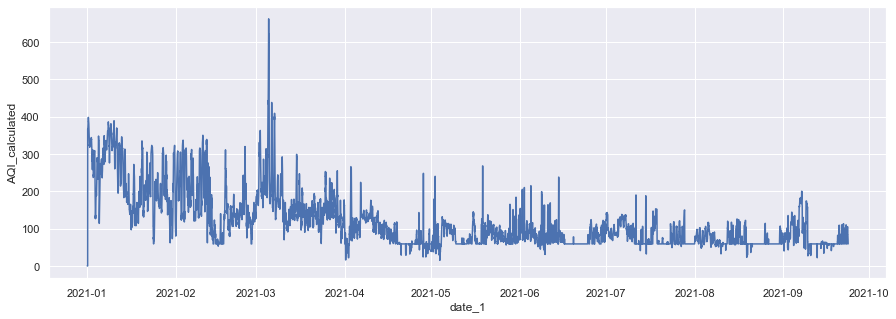

In [53]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_bandra_kurla[0:25500])

##### After Lockdown

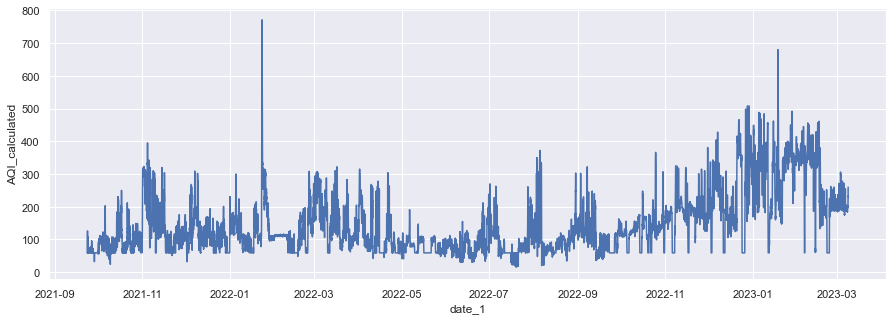

In [54]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_bandra_kurla[25500:76475])

#### 3. Bandra Mumbai

In [24]:
df_bandra_mumbai=pd.read_csv('bandra_mumbai.csv')
df_bandra_mumbai['NH3']=0
df_bandra_mumbai = date_column(df_bandra_mumbai)
df_bandra_mumbai['station'] = 'bandra_mumbai'
df_date=df_bandra_mumbai[['date_1','date_2','station']]
df_bandra_mumbai_1=df_bandra_mumbai[clms_to_knn]
df_bandra_mumbai_1=knn_imputing(df_bandra_mumbai_1)
df_bandra_mumbai_1.isnull().sum()
df_bandra_mumbai = pd.concat([df_date, df_bandra_mumbai_1], axis=1)

df_bandra_mumbai = avg_no(df_bandra_mumbai)
df_bandra_mumbai["PM2.5_μg"] = df_bandra_mumbai["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
df_bandra_mumbai["PM10_μg"] = df_bandra_mumbai["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))
df_bandra_mumbai["SO2_μg"] = df_bandra_mumbai["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))
df_bandra_mumbai["NOx_μg"] = df_bandra_mumbai["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))
df_bandra_mumbai["NH3_μg"] = 0
df_bandra_mumbai["Ozone_μg"] = df_bandra_mumbai["Ozone_8hr_max"].apply(lambda x: get_Ozone_subindex(x))
df_bandra_mumbai["CO_μg"] = df_bandra_mumbai["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))
df_bandra_mumbai["Checks"] = (df_bandra_mumbai["PM2.5_μg"] > 0).astype(int) + \
                (df_bandra_mumbai["PM10_μg"] > 0).astype(int) + \
                (df_bandra_mumbai["SO2_μg"] > 0).astype(int) + \
                (df_bandra_mumbai["NOx_μg"] > 0).astype(int) + \
                (df_bandra_mumbai["NH3_μg"] > 0).astype(int) + \
                (df_bandra_mumbai["CO_μg"] > 0).astype(int) + \
                (df_bandra_mumbai["Ozone_μg"] > 0).astype(int)

df_bandra_mumbai["AQI_calculated"] = round(df_bandra_mumbai[["PM2.5_μg", "PM10_μg", "SO2_μg", "NOx_μg",
                                 "NH3_μg", "CO_μg", "Ozone_μg"]].max(axis = 1))
df_bandra_mumbai.loc[df_bandra_mumbai["PM2.5_μg"] + df_bandra_mumbai["PM10_μg"] <= 0, "AQI_calculated"] = np.NaN
df_bandra_mumbai.loc[df_bandra_mumbai.Checks < 3, "AQI_calculated"] = np.NaN

df_bandra_mumbai["AQI_bucket_calculated"] = df_bandra_mumbai["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

df_bandra_mumbai=df_bandra_mumbai.fillna(value= 0)
df_bandra_mumbai.info()
df_bandra_mumbai.columns
df_bandra_mumbai.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76363 entries, 0 to 76362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_1                 76363 non-null  datetime64[ns]
 1   date_2                 76363 non-null  datetime64[ns]
 2   station                76363 non-null  object        
 3   PM2.5                  76363 non-null  float64       
 4   PM10                   76363 non-null  float64       
 5   NO                     76363 non-null  float64       
 6   NO2                    76363 non-null  float64       
 7   NOx                    76363 non-null  float64       
 8   NH3                    76363 non-null  float64       
 9   SO2                    76363 non-null  float64       
 10  CO                     76363 non-null  float64       
 11  Ozone                  76363 non-null  float64       
 12  Benzene                76363 non-null  float64       
 13  W

date_1                   0
date_2                   0
station                  0
PM2.5                    0
PM10                     0
NO                       0
NO2                      0
NOx                      0
NH3                      0
SO2                      0
CO                       0
Ozone                    0
Benzene                  0
WS                       0
WD                       0
TOT-RF                   0
PM10_24hr_avg            0
PM2.5_24hr_avg           0
SO2_24hr_avg             0
NOx_24hr_avg             0
NH3_24hr_avg             0
CO_8hr_max               0
Ozone_8hr_max            0
PM2.5_μg                 0
PM10_μg                  0
SO2_μg                   0
NOx_μg                   0
NH3_μg                   0
Ozone_μg                 0
CO_μg                    0
Checks                   0
AQI_calculated           0
AQI_bucket_calculated    0
dtype: int64

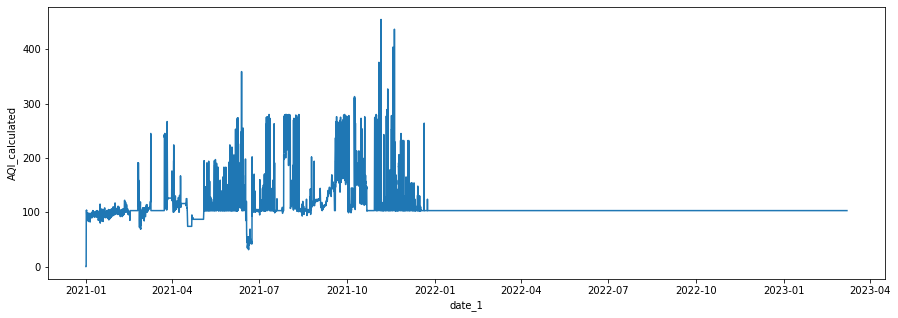

In [57]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_bandra_mumbai)

#### During Lockdown

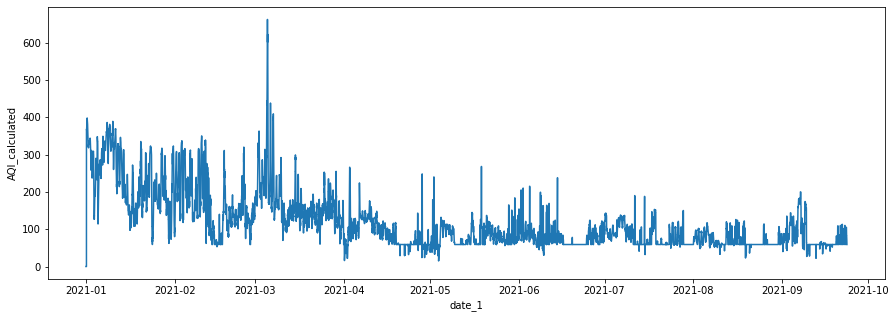

In [112]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_bandra_mumbai[0:25500])

#### After Lockdown

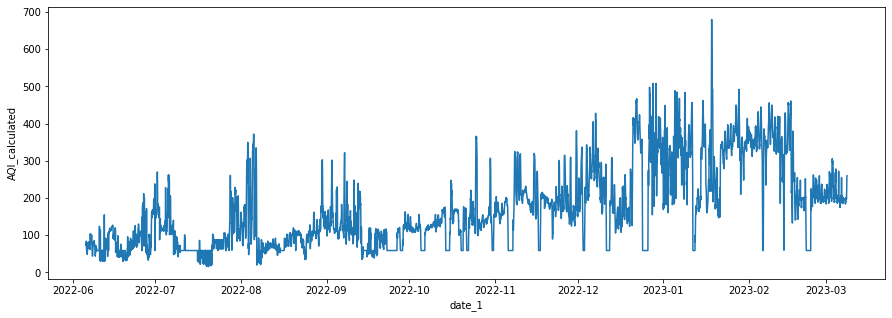

In [113]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_bandra_mumbai[50000:76475])

#### 4. Deonar 

In [28]:
df_deonar=pd.read_csv('deonar.csv')
df_deonar = date_column(df_deonar)
df_deonar['station'] = 'deonar'
df_date=df_deonar[['date_1','date_2','station']]
df_deonar_1=df_deonar[clms_to_knn]
df_deonar_1=knn_imputing(df_deonar_1)
df_deonar_1.isnull().sum()
df_deonar = pd.concat([df_date, df_deonar_1], axis=1)

df_deonar = avg_no(df_deonar)
df_deonar["PM2.5_μg"] = df_deonar["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
df_deonar["PM10_μg"] = df_deonar["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))
df_deonar["SO2_μg"] = df_deonar["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))
df_deonar["NOx_μg"] = df_deonar["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))
df_deonar["NH3_μg"] = df_deonar["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))
df_deonar["Ozone_μg"] = df_deonar["Ozone_8hr_max"].apply(lambda x: get_Ozone_subindex(x))
df_deonar["CO_μg"] = df_deonar["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))
df_deonar["Checks"] = (df_deonar["PM2.5_μg"] > 0).astype(int) + \
                (df_deonar["PM10_μg"] > 0).astype(int) + \
                (df_deonar["SO2_μg"] > 0).astype(int) + \
                (df_deonar["NOx_μg"] > 0).astype(int) + \
                (df_deonar["NH3_μg"] > 0).astype(int) + \
                (df_deonar["CO_μg"] > 0).astype(int) + \
                (df_deonar["Ozone_μg"] > 0).astype(int)

df_deonar["AQI_calculated"] = round(df_deonar[["PM2.5_μg", "PM10_μg", "SO2_μg", "NOx_μg",
                                 "NH3_μg", "CO_μg", "Ozone_μg"]].max(axis = 1))
df_deonar.loc[df_deonar["PM2.5_μg"] + df_deonar["PM10_μg"] <= 0, "AQI_calculated"] = np.NaN
df_deonar.loc[df_deonar.Checks < 3, "AQI_calculated"] = np.NaN

df_deonar["AQI_bucket_calculated"] = df_deonar["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

df_deonar=df_deonar.fillna(value=0)
df_deonar.info()
df_deonar.columns
df_deonar.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76321 entries, 0 to 76320
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_1                 76321 non-null  datetime64[ns]
 1   date_2                 76321 non-null  datetime64[ns]
 2   station                76321 non-null  object        
 3   PM2.5                  76321 non-null  float64       
 4   PM10                   76321 non-null  float64       
 5   NO                     76321 non-null  float64       
 6   NO2                    76321 non-null  float64       
 7   NOx                    76321 non-null  float64       
 8   NH3                    76321 non-null  float64       
 9   SO2                    76321 non-null  float64       
 10  CO                     76321 non-null  float64       
 11  Ozone                  76321 non-null  float64       
 12  Benzene                76321 non-null  float64       
 13  W

date_1                   0
date_2                   0
station                  0
PM2.5                    0
PM10                     0
NO                       0
NO2                      0
NOx                      0
NH3                      0
SO2                      0
CO                       0
Ozone                    0
Benzene                  0
WS                       0
WD                       0
TOT-RF                   0
PM10_24hr_avg            0
PM2.5_24hr_avg           0
SO2_24hr_avg             0
NOx_24hr_avg             0
NH3_24hr_avg             0
CO_8hr_max               0
Ozone_8hr_max            0
PM2.5_μg                 0
PM10_μg                  0
SO2_μg                   0
NOx_μg                   0
NH3_μg                   0
Ozone_μg                 0
CO_μg                    0
Checks                   0
AQI_calculated           0
AQI_bucket_calculated    0
dtype: int64

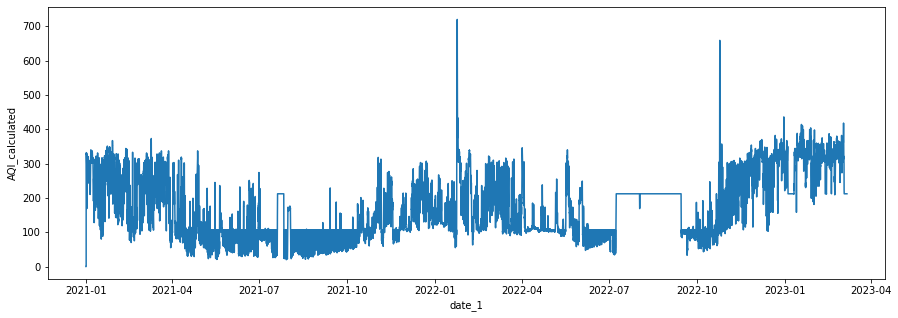

In [32]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_deonar)

#### During Lockdown

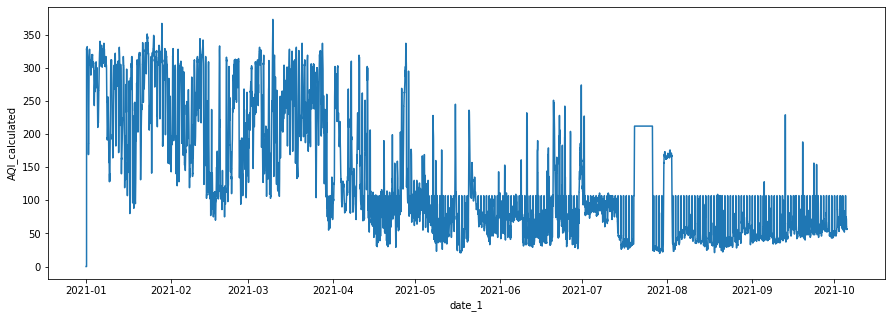

In [33]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_deonar[0:26650])

#### After Lockdown

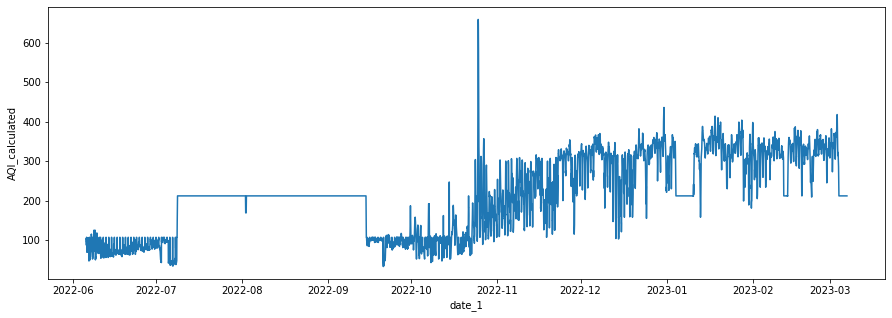

In [139]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_deonar[50000:76475])

#### 5. Kurla Station

In [29]:
df_kurla=pd.read_csv('kurla.csv')
df_kurla = date_column(df_kurla)
df_kurla['station'] = 'kurla'
df_date=df_kurla[['date_1','date_2','station']]
df_kurla_1=df_kurla[clms_to_knn]
df_kurla_1=knn_imputing(df_kurla_1)
df_kurla_1.isnull().sum()
df_kurla = pd.concat([df_date, df_kurla_1], axis=1)

df_kurla = avg_no(df_kurla)
df_kurla["PM2.5_μg"] = df_kurla["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
df_kurla["PM10_μg"] = df_kurla["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))
df_kurla["SO2_μg"] = df_kurla["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))
df_kurla["NOx_μg"] = df_kurla["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))
df_kurla["NH3_μg"] = df_kurla["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))
df_kurla["Ozone_μg"] = df_kurla["Ozone_8hr_max"].apply(lambda x: get_Ozone_subindex(x))
df_kurla["CO_μg"] = df_kurla["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))
df_kurla["Checks"] = (df_kurla["PM2.5_μg"] > 0).astype(int) + \
                (df_kurla["PM10_μg"] > 0).astype(int) + \
                (df_kurla["SO2_μg"] > 0).astype(int) + \
                (df_kurla["NOx_μg"] > 0).astype(int) + \
                (df_kurla["NH3_μg"] > 0).astype(int) + \
                (df_kurla["CO_μg"] > 0).astype(int) + \
                (df_kurla["Ozone_μg"] > 0).astype(int)

df_kurla["AQI_calculated"] = round(df_kurla[["PM2.5_μg", "PM10_μg", "SO2_μg", "NOx_μg",
                                 "NH3_μg", "CO_μg", "Ozone_μg"]].max(axis = 1))
df_kurla.loc[df_kurla["PM2.5_μg"] + df_kurla["PM10_μg"] <= 0, "AQI_calculated"] = np.NaN
df_kurla.loc[df_kurla.Checks < 3, "AQI_calculated"] = np.NaN

df_kurla["AQI_bucket_calculated"] = df_kurla["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

df_kurla=df_kurla.fillna(value=0)
df_kurla.info()
df_kurla.columns
df_kurla.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76321 entries, 0 to 76320
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_1                 76321 non-null  datetime64[ns]
 1   date_2                 76321 non-null  datetime64[ns]
 2   station                76321 non-null  object        
 3   PM2.5                  76321 non-null  float64       
 4   PM10                   76321 non-null  float64       
 5   NO                     76321 non-null  float64       
 6   NO2                    76321 non-null  float64       
 7   NOx                    76321 non-null  float64       
 8   NH3                    76321 non-null  float64       
 9   SO2                    76321 non-null  float64       
 10  CO                     76321 non-null  float64       
 11  Ozone                  76321 non-null  float64       
 12  Benzene                76321 non-null  float64       
 13  W

date_1                   0
date_2                   0
station                  0
PM2.5                    0
PM10                     0
NO                       0
NO2                      0
NOx                      0
NH3                      0
SO2                      0
CO                       0
Ozone                    0
Benzene                  0
WS                       0
WD                       0
TOT-RF                   0
PM10_24hr_avg            0
PM2.5_24hr_avg           0
SO2_24hr_avg             0
NOx_24hr_avg             0
NH3_24hr_avg             0
CO_8hr_max               0
Ozone_8hr_max            0
PM2.5_μg                 0
PM10_μg                  0
SO2_μg                   0
NOx_μg                   0
NH3_μg                   0
Ozone_μg                 0
CO_μg                    0
Checks                   0
AQI_calculated           0
AQI_bucket_calculated    0
dtype: int64

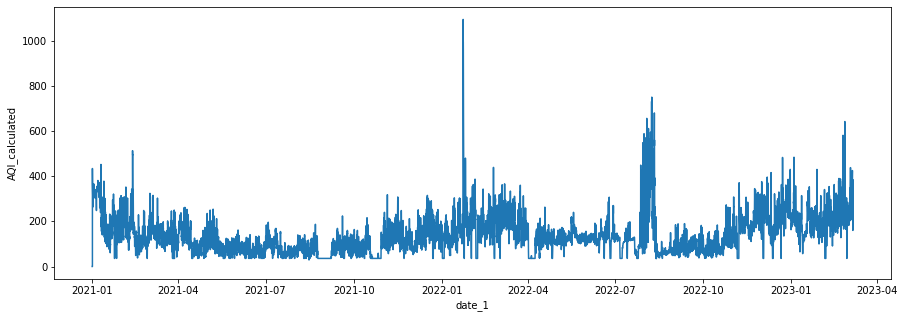

In [35]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_kurla)

###### During Lockdown

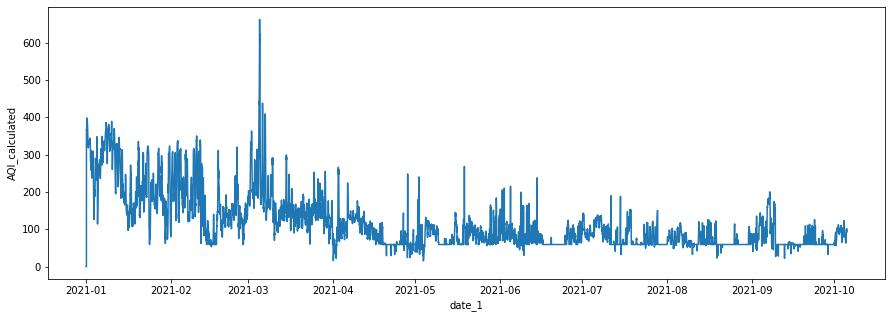

In [122]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_kurla[0:26650])

In [154]:
##### After Lockdown

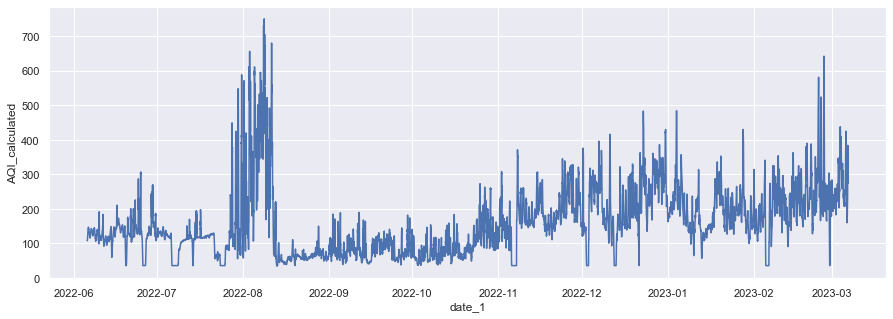

In [56]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_kurla[50000:76475])

#### 6. Malad Station

In [30]:
df_malad=pd.read_csv('malad.csv')
df_malad = date_column(df_malad)
df_malad['station'] = 'malad'
df_date=df_malad[['date_1','date_2','station']]
df_malad_1=df_malad[clms_to_knn]
df_malad_1=knn_imputing(df_malad_1)
df_malad_1.isnull().sum()
df_malad = pd.concat([df_date, df_malad_1], axis=1)

df_malad = avg_no(df_malad)
df_malad["PM2.5_μg"] = df_malad["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
df_malad["PM10_μg"] = df_malad["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))
df_malad["SO2_μg"] = df_malad["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))
df_malad["NOx_μg"] = df_malad["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))
df_malad["NH3_μg"] = df_malad["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))
df_malad["Ozone_μg"] = df_malad["Ozone_8hr_max"].apply(lambda x: get_Ozone_subindex(x))
df_malad["CO_μg"] = df_malad["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))
df_malad["Checks"] = (df_malad["PM2.5_μg"] > 0).astype(int) + \
                (df_malad["PM10_μg"] > 0).astype(int) + \
                (df_malad["SO2_μg"] > 0).astype(int) + \
                (df_malad["NOx_μg"] > 0).astype(int) + \
                (df_malad["NH3_μg"] > 0).astype(int) + \
                (df_malad["CO_μg"] > 0).astype(int) + \
                (df_malad["Ozone_μg"] > 0).astype(int)

df_malad["AQI_calculated"] = round(df_malad[["PM2.5_μg", "PM10_μg", "SO2_μg", "NOx_μg",
                                 "NH3_μg", "CO_μg", "Ozone_μg"]].max(axis = 1))
df_malad.loc[df_malad["PM2.5_μg"] + df_malad["PM10_μg"] <= 0, "AQI_calculated"] = np.NaN
df_malad.loc[df_malad.Checks < 3, "AQI_calculated"] = np.NaN

df_malad["AQI_bucket_calculated"] = df_malad["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

df_malad=df_malad.fillna(value=0)
df_malad.info()
df_malad.columns
df_malad.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76321 entries, 0 to 76320
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_1                 76321 non-null  datetime64[ns]
 1   date_2                 76321 non-null  datetime64[ns]
 2   station                76321 non-null  object        
 3   PM2.5                  76321 non-null  float64       
 4   PM10                   76321 non-null  float64       
 5   NO                     76321 non-null  float64       
 6   NO2                    76321 non-null  float64       
 7   NOx                    76321 non-null  float64       
 8   NH3                    76321 non-null  float64       
 9   SO2                    76321 non-null  float64       
 10  CO                     76321 non-null  float64       
 11  Ozone                  76321 non-null  float64       
 12  Benzene                76321 non-null  float64       
 13  W

date_1                   0
date_2                   0
station                  0
PM2.5                    0
PM10                     0
NO                       0
NO2                      0
NOx                      0
NH3                      0
SO2                      0
CO                       0
Ozone                    0
Benzene                  0
WS                       0
WD                       0
TOT-RF                   0
PM10_24hr_avg            0
PM2.5_24hr_avg           0
SO2_24hr_avg             0
NOx_24hr_avg             0
NH3_24hr_avg             0
CO_8hr_max               0
Ozone_8hr_max            0
PM2.5_μg                 0
PM10_μg                  0
SO2_μg                   0
NOx_μg                   0
NH3_μg                   0
Ozone_μg                 0
CO_μg                    0
Checks                   0
AQI_calculated           0
AQI_bucket_calculated    0
dtype: int64

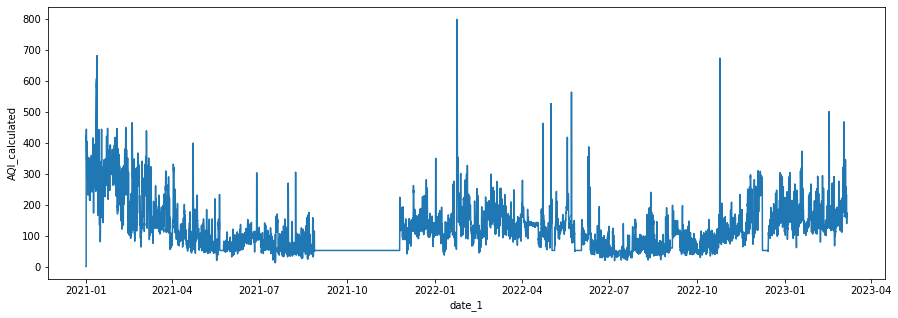

In [39]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_malad)

##### During Lockdown

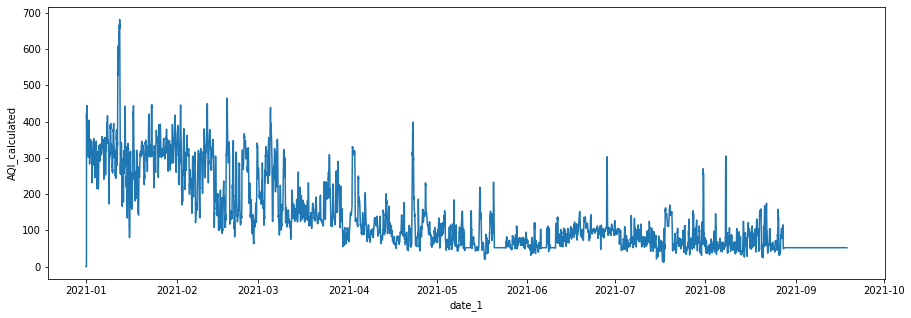

In [41]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_malad[0:25000])

##### After Lockdown

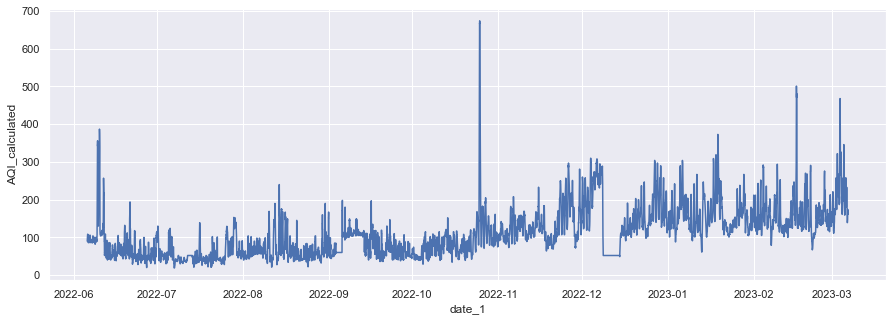

In [58]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_malad[50000:76321])

#### 7. Mazagaon Station

In [31]:
df_mazagaon=pd.read_csv('mazagaon.csv')
df_mazagaon = date_column(df_mazagaon)
df_mazagaon['station'] = 'mazagaon'
df_date=df_mazagaon[['date_1','date_2','station']]
df_mazagaon_1=df_mazagaon[clms_to_knn]
df_mazagaon_1=knn_imputing(df_mazagaon_1)
df_mazagaon_1.isnull().sum()
df_mazagaon = pd.concat([df_date, df_mazagaon_1], axis=1)

df_mazagaon = avg_no(df_mazagaon)
df_mazagaon["PM2.5_μg"] = df_mazagaon["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
df_mazagaon["PM10_μg"] = df_mazagaon["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))
df_mazagaon["SO2_μg"] = df_mazagaon["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))
df_mazagaon["NOx_μg"] = df_mazagaon["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))
df_mazagaon["NH3_μg"] = df_mazagaon["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))
df_mazagaon["Ozone_μg"] = df_mazagaon["Ozone_8hr_max"].apply(lambda x: get_Ozone_subindex(x))
df_mazagaon["CO_μg"] = df_mazagaon["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))
df_mazagaon["Checks"] = (df_mazagaon["PM2.5_μg"] > 0).astype(int) + \
                (df_mazagaon["PM10_μg"] > 0).astype(int) + \
                (df_mazagaon["SO2_μg"] > 0).astype(int) + \
                (df_mazagaon["NOx_μg"] > 0).astype(int) + \
                (df_mazagaon["NH3_μg"] > 0).astype(int) + \
                (df_mazagaon["CO_μg"] > 0).astype(int) + \
                (df_mazagaon["Ozone_μg"] > 0).astype(int)

df_mazagaon["AQI_calculated"] = round(df_mazagaon[["PM2.5_μg", "PM10_μg", "SO2_μg", "NOx_μg",
                                 "NH3_μg", "CO_μg", "Ozone_μg"]].max(axis = 1))
df_mazagaon.loc[df_mazagaon["PM2.5_μg"] + df_mazagaon["PM10_μg"] <= 0, "AQI_calculated"] = np.NaN
df_mazagaon.loc[df_mazagaon.Checks < 3, "AQI_calculated"] = np.NaN

df_mazagaon["AQI_bucket_calculated"] = df_mazagaon["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

df_mazagaon=df_mazagaon.fillna(value=0)
df_mazagaon.info()
df_mazagaon.columns
df_mazagaon.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76393 entries, 0 to 76392
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_1                 76393 non-null  datetime64[ns]
 1   date_2                 76393 non-null  datetime64[ns]
 2   station                76393 non-null  object        
 3   PM2.5                  76393 non-null  float64       
 4   PM10                   76393 non-null  float64       
 5   NO                     76393 non-null  float64       
 6   NO2                    76393 non-null  float64       
 7   NOx                    76393 non-null  float64       
 8   NH3                    76393 non-null  float64       
 9   SO2                    76393 non-null  float64       
 10  CO                     76393 non-null  float64       
 11  Ozone                  76393 non-null  float64       
 12  Benzene                76393 non-null  float64       
 13  W

date_1                   0
date_2                   0
station                  0
PM2.5                    0
PM10                     0
NO                       0
NO2                      0
NOx                      0
NH3                      0
SO2                      0
CO                       0
Ozone                    0
Benzene                  0
WS                       0
WD                       0
TOT-RF                   0
PM10_24hr_avg            0
PM2.5_24hr_avg           0
SO2_24hr_avg             0
NOx_24hr_avg             0
NH3_24hr_avg             0
CO_8hr_max               0
Ozone_8hr_max            0
PM2.5_μg                 0
PM10_μg                  0
SO2_μg                   0
NOx_μg                   0
NH3_μg                   0
Ozone_μg                 0
CO_μg                    0
Checks                   0
AQI_calculated           0
AQI_bucket_calculated    0
dtype: int64

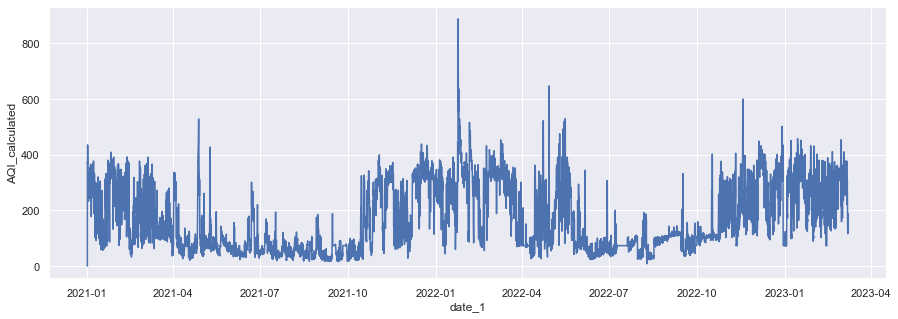

In [59]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_mazagaon)

##### During Lockdown

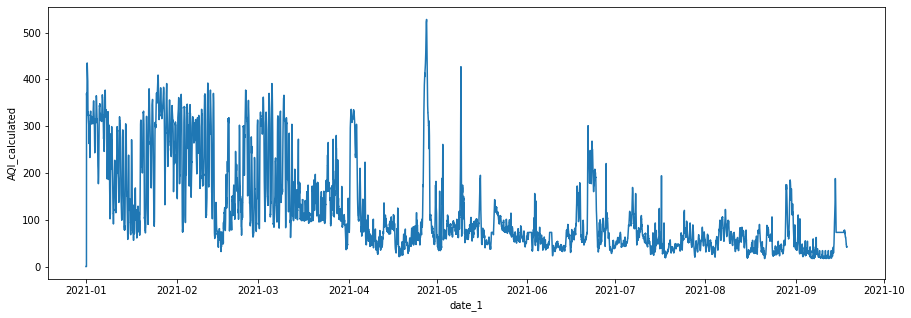

In [44]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_mazagaon[0:25000])

##### After Lockdown

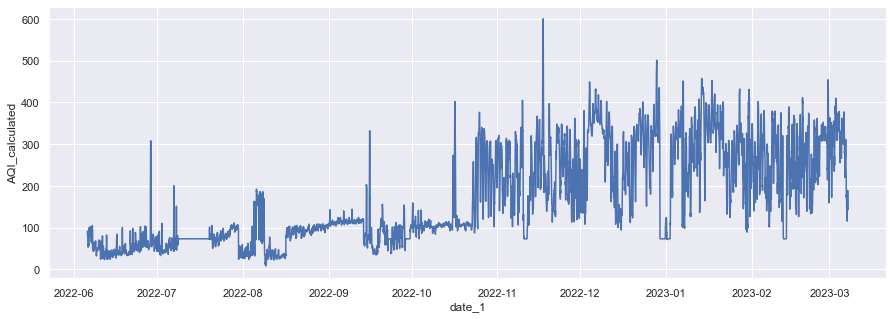

In [60]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_mazagaon[50000:76393])

#### 8. Worli Station

In [32]:
df_worli=pd.read_csv('worli.csv')
df_worli = date_column(df_worli)
df_worli['station'] = 'worli'
df_date=df_worli[['date_1','date_2','station']]
df_worli_1=df_worli[clms_to_knn]
df_worli_1=knn_imputing(df_worli_1)
df_worli_1.isnull().sum()
df_worli = pd.concat([df_date, df_worli_1], axis=1)

df_worli = avg_no(df_worli)
df_worli["PM2.5_μg"] = df_worli["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
df_worli["PM10_μg"] = df_worli["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))
df_worli["SO2_μg"] = df_worli["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))
df_worli["NOx_μg"] = df_worli["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))
df_worli["NH3_μg"] = df_worli["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))
df_worli["Ozone_μg"] = df_worli["Ozone_8hr_max"].apply(lambda x: get_Ozone_subindex(x))
df_worli["CO_μg"] = df_worli["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))
df_worli["Checks"] = (df_worli["PM2.5_μg"] > 0).astype(int) + \
                (df_worli["PM10_μg"] > 0).astype(int) + \
                (df_worli["SO2_μg"] > 0).astype(int) + \
                (df_worli["NOx_μg"] > 0).astype(int) + \
                (df_worli["NH3_μg"] > 0).astype(int) + \
                (df_worli["CO_μg"] > 0).astype(int) + \
                (df_worli["Ozone_μg"] > 0).astype(int)

df_worli["AQI_calculated"] = round(df_worli[["PM2.5_μg", "PM10_μg", "SO2_μg", "NOx_μg",
                                 "NH3_μg", "CO_μg", "Ozone_μg"]].max(axis = 1))
df_worli.loc[df_worli["PM2.5_μg"] + df_worli["PM10_μg"] <= 0, "AQI_calculated"] = np.NaN
df_worli.loc[df_worli.Checks < 3, "AQI_calculated"] = np.NaN

df_worli["AQI_bucket_calculated"] = df_worli["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

df_worli=df_worli.fillna(value=0)
df_worli.info()
df_worli.columns
df_worli.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76321 entries, 0 to 76320
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_1                 76321 non-null  datetime64[ns]
 1   date_2                 76321 non-null  datetime64[ns]
 2   station                76321 non-null  object        
 3   PM2.5                  76321 non-null  float64       
 4   PM10                   76321 non-null  float64       
 5   NO                     76321 non-null  float64       
 6   NO2                    76321 non-null  float64       
 7   NOx                    76321 non-null  float64       
 8   NH3                    76321 non-null  float64       
 9   SO2                    76321 non-null  float64       
 10  CO                     76321 non-null  float64       
 11  Ozone                  76321 non-null  float64       
 12  Benzene                76321 non-null  float64       
 13  W

date_1                   0
date_2                   0
station                  0
PM2.5                    0
PM10                     0
NO                       0
NO2                      0
NOx                      0
NH3                      0
SO2                      0
CO                       0
Ozone                    0
Benzene                  0
WS                       0
WD                       0
TOT-RF                   0
PM10_24hr_avg            0
PM2.5_24hr_avg           0
SO2_24hr_avg             0
NOx_24hr_avg             0
NH3_24hr_avg             0
CO_8hr_max               0
Ozone_8hr_max            0
PM2.5_μg                 0
PM10_μg                  0
SO2_μg                   0
NOx_μg                   0
NH3_μg                   0
Ozone_μg                 0
CO_μg                    0
Checks                   0
AQI_calculated           0
AQI_bucket_calculated    0
dtype: int64

##### During Lockdown

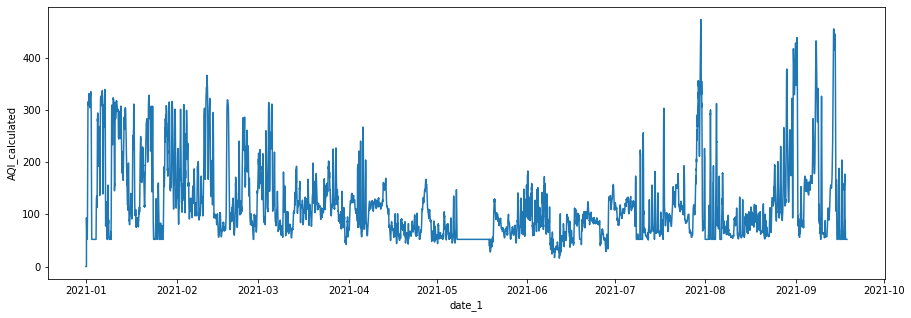

In [46]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_worli[0:25000])

##### After Lockdown

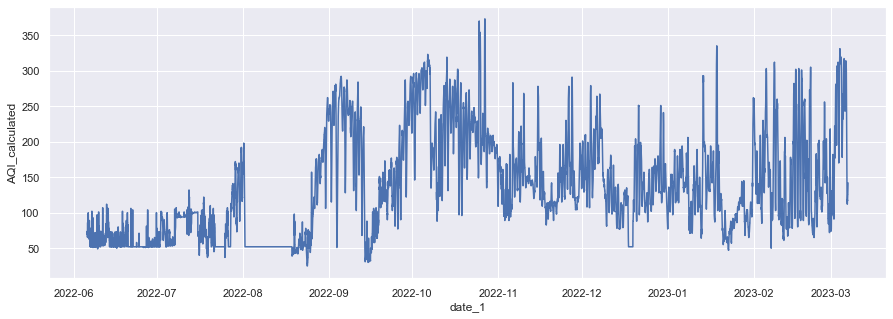

In [61]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="AQI_calculated", ax=ax, data=df_worli[50000:76321])

### Complete Dataset

In [147]:
df_kurla.head()

,date_1,date_2,station,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,...,PM2.5_μg,PM10_μg,SO2_μg,NOx_μg,NH3_μg,Ozone_μg,CO_μg,Checks,AQI_calculated,AQI_bucket_calculated
0,2021-01-01 00:00:00,2021-01-01 00:15:00,kurla,150.00,330.21,92.03,25.09,117.14,38.31,37.22,...,0.0,0.0,0.0,0.0,0.0,6.09,107.625,2,0.0,0
1,2021-01-01 00:15:00,2021-01-01 00:30:00,kurla,150.00,398.00,101.03,23.89,124.94,37.90,38.60,...,0.0,0.0,0.0,0.0,0.0,6.09,107.625,2,0.0,0
2,2021-01-01 00:30:00,2021-01-01 00:45:00,kurla,150.00,398.00,113.79,22.28,136.06,36.74,40.23,...,0.0,0.0,0.0,0.0,0.0,7.27,107.625,2,0.0,0
3,2021-01-01 00:45:00,2021-01-01 01:00:00,kurla,164.42,398.00,126.27,22.24,148.53,28.61,36.52,...,0.0,0.0,0.0,0.0,0.0,7.27,107.625,2,0.0,0
4,2021-01-01 01:00:00,2021-01-01 01:15:00,kurla,209.00,459.16,131.90,22.61,154.51,24.13,33.75,...,0.0,0.0,0.0,0.0,0.0,7.27,107.625,2,0.0,0


In [42]:
df = pd.concat([df_airport, df_bandra_kurla, df_bandra_mumbai, 
                df_deonar, df_kurla, df_malad, df_mazagaon, df_worli], ignore_index=True)

In [157]:
df.shape

(610836, 33)

In [62]:
df.to_excel('df_final.xlsx')

## Data Sufficiency Report:
- Data is sufficient for doing analysis and prediction. There are 8 data sources: CSV .
- Data transformation is implemented on csv data.
- Final Data shape: (610836, 33)
- Null values are handled using KNN imputer 
- Outlier handling is not performed as of now.

### EDA

In [ ]:
scatterplot 
boxplot and barchart
valuecouts
correlation
Hypothesis Testing

In [63]:
df.columns

Index(['date_1', 'date_2', 'station', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'WS', 'WD', 'TOT-RF',
       'PM10_24hr_avg', 'PM2.5_24hr_avg', 'SO2_24hr_avg', 'NOx_24hr_avg',
       'NH3_24hr_avg', 'CO_8hr_max', 'Ozone_8hr_max', 'PM2.5_μg', 'PM10_μg',
       'SO2_μg', 'NOx_μg', 'NH3_μg', 'Ozone_μg', 'CO_μg', 'Checks',
       'AQI_calculated', 'AQI_bucket_calculated'],
      dtype='object')

In [80]:
clmns_to_eda=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 
              'SO2', 'CO', 'Ozone', 'Benzene', 'WS', 'WD',
              'station','PM2.5_μg', 'PM10_μg','SO2_μg', 'NOx_μg', 
              'NH3_μg', 'Ozone_μg', 'CO_μg','AQI_calculated','AQI_bucket_calculated']

In [81]:
df_eda=df[clmns_to_eda]

In [ ]:
#### Heatmap

<AxesSubplot: >

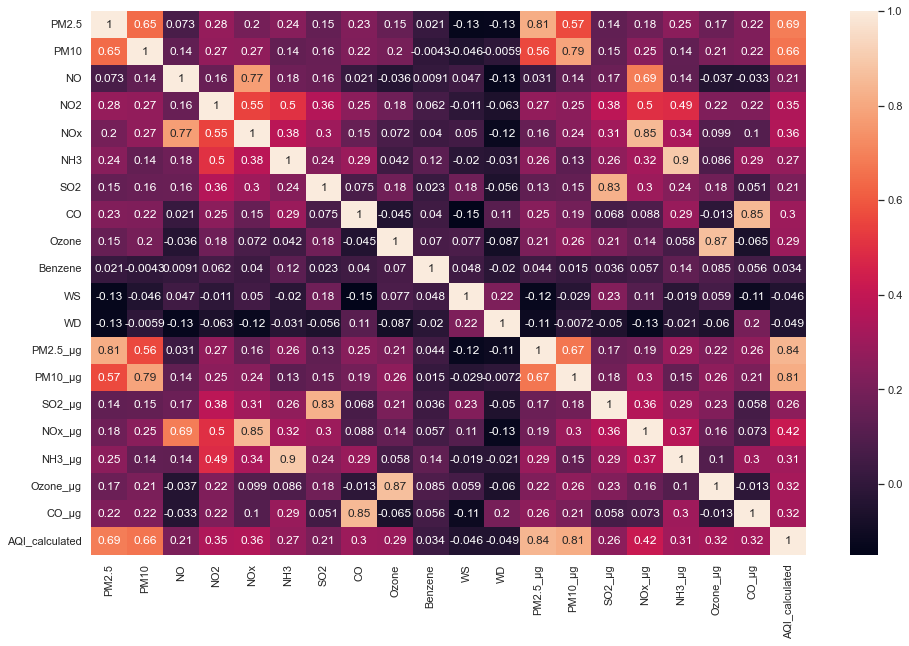

In [76]:
data=df_eda.corr()
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data,annot=True)

#### Insights:
- 'PM2.5_μg','PM10_μg' and 'NOx_μg' is showing strong positive correlation with AQI.

In [77]:
df_eda.corr()['AQI_calculated']

PM2.5             0.686582
PM10              0.663638
NO                0.210682
NO2               0.347897
NOx               0.357465
NH3               0.274205
SO2               0.209558
CO                0.295872
Ozone             0.293526
Benzene           0.033969
WS               -0.045906
WD               -0.049038
PM2.5_μg          0.839053
PM10_μg           0.812654
SO2_μg            0.255446
NOx_μg            0.419071
NH3_μg            0.310048
Ozone_μg          0.323845
CO_μg             0.322058
AQI_calculated    1.000000
Name: AQI_calculated, dtype: float64

In [82]:
def scatterplot_AQI_PM(data):
    plt.figure(figsize=(15,10))
    
    columns=['PM2.5_μg','PM10_μg', 'SO2_μg', 'NOx_μg']
    for i, column in enumerate(columns):
        plt.subplot(2, 2, i+1)
        sns.scatterplot(column, 'AQI_calculated', hue='AQI_bucket_calculated', style='station' , data=df_eda)

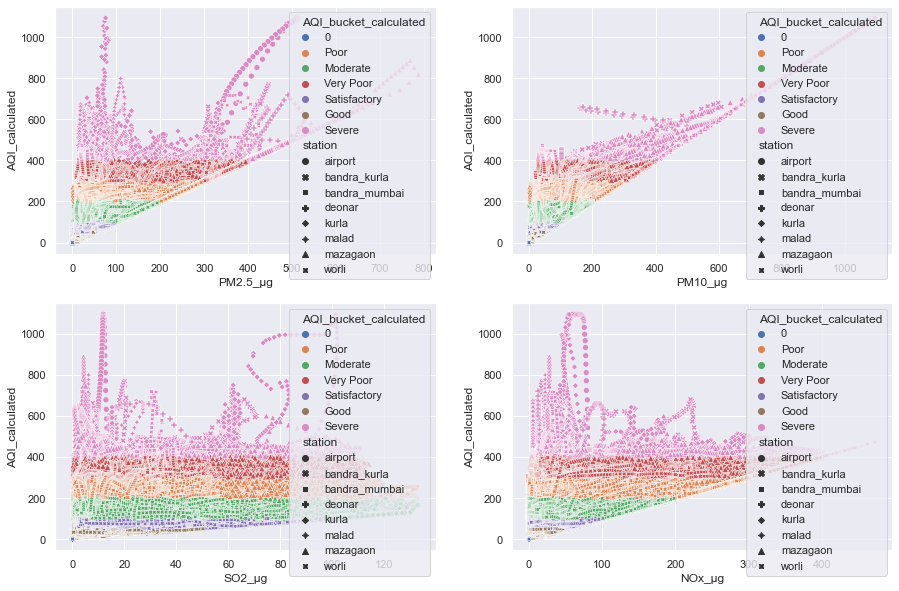

In [83]:
scatterplot_AQI_PM(df_eda)

In [46]:
df.groupby(['station','AQI_bucket_calculated'])['AQI_calculated','PM2.5_μg','PM10_μg','SO2_μg','NOx_μg'].agg(['mean','std'])

AQI_calculated                PM2.5_μg  \
                                              mean         std        mean   
station       AQI_bucket_calculated                                          
airport       0                           0.000000    0.000000    0.000000   
              Good                       46.073314    3.893874   23.597206   
              Moderate                  142.530746   27.849388   66.722093   
              Poor                      234.362633   24.889434  151.703348   
              Satisfactory               83.528168   11.934687   34.529917   
              Severe                    599.546961  229.768880  328.783033   
              Very Poor                 332.428414   25.221059  237.154578   
bandra_kurla  0                           0.000000    0.000000    0.000000   
              Good                       38.514324    8.837607   26.294645   
              Moderate                  137.114945   29.407036   89.881741   
              Poor                      240.614135   28.523145  194.832113   
              Satisfactory               69.874387   13.480342   36.423842   
              Severe                    450.643341   63.527576  411.843147   
              Very Poor                 337.761168   27.136701  329.002122   
bandra_mumbai 0                           0.000000    0.000000    0.000000   
              Good                       42.181176    4.651296   39.105910   
              Moderate                  108.769277   16.086954   73.332359   
              Poor                      249.273210   24.034815   68.207292   
              Satisfactory               89.581857    9.233544   34.652419   
              Severe                    426.947368   17.970574   63.333333   
              Very Poor                 349.263158   31.603196   64.001715   
deonar        0                           0.000000    0.000000    0.000000   
              Good                       39.582687    7.250545   25.991392   
              Moderate                  133.948875   30.352523  109.297650   
              Poor                      231.384272   27.532697  228.448487   
              Satisfactory               77.071836   14.245583   43.016422   
              Severe                    498.248649   96.827799  452.631880   
              Very Poor                 326.715124   20.722271  326.677626   
kurla         0                           0.000000    0.000000    0.000000   
              Good                       38.604967    4.466129   15.403881   
              Moderate                  140.665581   27.809912   76.867388   
              Poor                      240.957521   27.501721  133.224272   
              Satisfactory               76.415905   14.494761   45.171263   
              Severe                    512.896679  118.773895  127.299459   
              Very Poor                 330.060309   23.716285  211.558503   
malad         0                           0.000000    0.000000    0.000000   
              Good                       41.842478    6.803696   29.249952   
              Moderate                  136.378279   25.918779   72.919425   
              Poor                      241.066137   28.177319  199.840677   
              Satisfactory               66.322639   16.224395   45.521692   
              Severe                    497.090110   93.243031  221.849861   
              Very Poor                 329.596382   24.172872  307.894348   
mazagaon      0                           0.000000    0.000000    0.000000   
              Good                       37.166078    8.686343   24.829020   
              Moderate                  137.870715   30.923032   99.152958   
              Poor                      251.501958   28.966764  220.250942   
              Satisfactory               74.591259   13.320280   53.413937   
              Severe                    454.411175   64.366814  449.152637   
              Very Poor                 333.252935   24.33

### Q- Which Station is highly impacted from pollution

In [47]:
def barplot_station(data):
    plt.figure(figsize=(15,20))
    
    columns=['AQI_calculated','PM2.5_μg','PM10_μg']
    for i, column in enumerate(columns):
        plt.subplot(3, 1, i+1)
        sns.barplot('station',column,data=df)

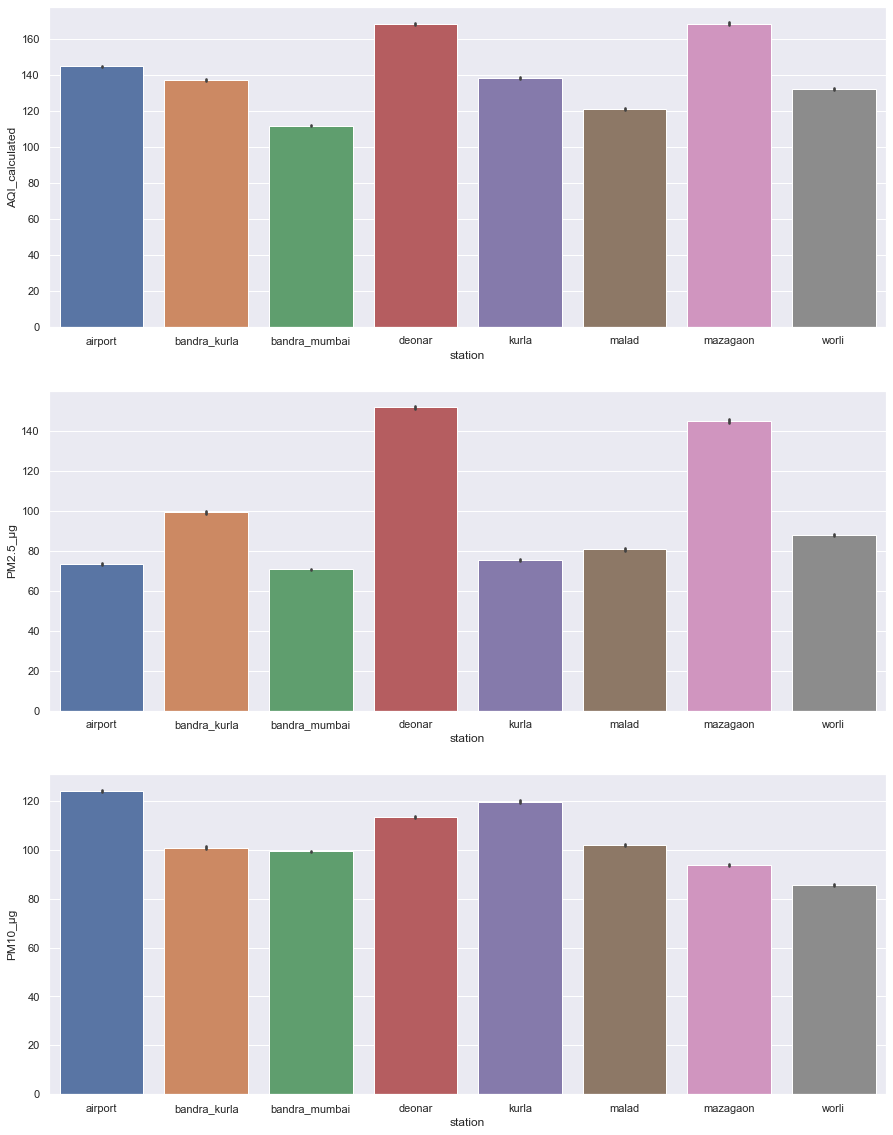

In [48]:
barplot_station(df)

In [49]:
df.groupby(['station'])['AQI_calculated','PM2.5_μg','PM10_μg','PM2.5'].agg(['mean','std','max'])

AQI_calculated                        PM2.5_μg              \
                        mean         std     max        mean         std   
station                                                                    
airport           144.796347   58.920237  1094.0   73.174334   51.875702   
bandra_kurla      137.133298   88.441055   771.0   99.247818   97.474987   
bandra_mumbai     111.786467   31.531768   455.0   70.558297   16.796200   
deonar            168.385870   92.925402   720.0  151.556466  106.777008   
kurla             138.100667   83.007805  1094.0   75.395621   65.958061   
malad             121.350166   79.001220   799.0   80.560121   80.283513   
mazagaon          168.496341  117.496501   888.0  144.728693  126.669949   
worli             132.014242   73.810058   718.0   87.592948   77.401332   

                              PM10_μg                              PM2.5  \
                      max        mean        std          max       mean   
station                                                                    
airport        515.415385  124.004787  68.990696  1093.750000  40.664217   
bandra_kurla   680.421795  100.893260  69.663061   770.943542  52.552640   
bandra_mumbai  266.641667   99.283691  14.114654   147.387500  42.272083   
deonar         658.280449  113.272618  63.714495   719.953125  72.849251   
kurla          428.288333  119.569714  84.323936  1093.750000  40.685383   
malad          465.330769  101.846175  63.718309   798.855208  42.773181   
mazagaon       787.166026   93.772823  72.536458   887.615104  73.585383   
worli          424.360577   85.616636  43.848482   717.610104  45.142461   

                                  
                     std     max  
station                           
airport        29.290863  985.00  
bandra_kurla   59.468103  991.87  
bandra_mumbai  11.564563  369.60  
deonar         52.659469  659.82  
kurla          44.066797  985.00  
malad          43.498529  921.19  
mazagaon       75.564505  998.68  
worli          36.710039  340.00

#### Insights:
- Deonar and Mazagaon are highest polluted stations.
- While Airport, Bandra_kurla, Kurla and Worli are emerging as polluted stations(SD is less and Max is also greater than stations)

In [50]:
def boxplot_station(data):
    plt.figure(figsize=(15,8))
    
    columns=['AQI_calculated','PM2.5_μg']
    for i, column in enumerate(columns):
        plt.subplot(1, 2, i+1)
        sns.boxplot('station',column,data=df)

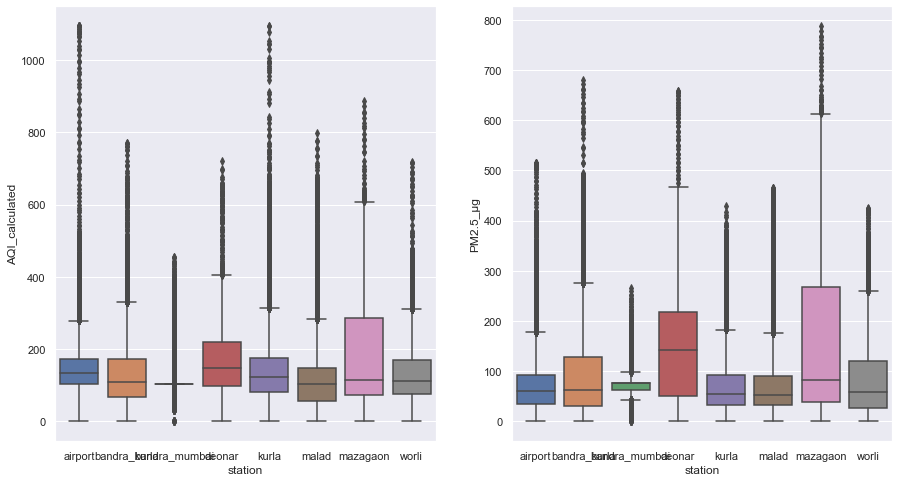

In [52]:
boxplot_station(df)

### Q- What are the factors involved in to increase the AQI

##### We need to observe the line plots for pollutant vs year for Deonar station. We can scale up following visulaization charts for other stations.

In [89]:
df.index[df['station'] == 'deonar']

Int64Index([229159, 229160, 229161, 229162, 229163, 229164, 229165, 229166,
            229167, 229168,
            ...
            305470, 305471, 305472, 305473, 305474, 305475, 305476, 305477,
            305478, 305479],
           dtype='int64', length=76321)

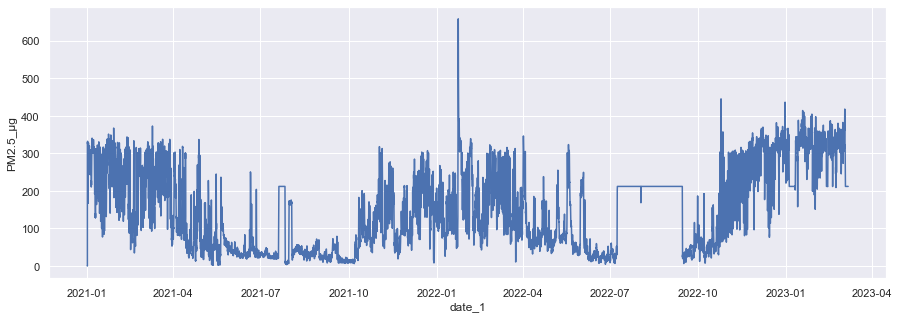

In [90]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions

graph = sns.lineplot(x="date_1", y="PM2.5_μg", ax=ax, data=df[229159:305479])

In [91]:
df_year_pollutant.columns

Index(['date_1', 'PM2.5_μg', 'PM10_μg', 'SO2_μg', 'NOx_μg', 'NH3_μg',
       'Ozone_μg', 'CO_μg', 'AQI_calculated'],
      dtype='object')

In [92]:
df_year_pollutant.head()

,date_1,PM2.5_μg,PM10_μg,SO2_μg,NOx_μg,NH3_μg,Ozone_μg,CO_μg,AQI_calculated
0,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,6.76,93.500,0.0
1,2021-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,6.76,96.500,0.0
2,2021-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,6.76,98.500,0.0
3,2021-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,6.76,100.125,0.0
4,2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,6.76,100.625,0.0


In [98]:
df_year_pollutant['year'] = df_year_pollutant['date_1'].dt.year
df_year_pollutant['month'] = df_year_pollutant['date_1'].dt.month

In [102]:
df_year_pollutant.head()

,date_1,PM2.5_μg,PM10_μg,SO2_μg,NOx_μg,NH3_μg,Ozone_μg,CO_μg,AQI_calculated,year,month
0,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,6.76,93.500,0.0,2021,1
1,2021-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,6.76,96.500,0.0,2021,1
2,2021-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,6.76,98.500,0.0,2021,1
3,2021-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,6.76,100.125,0.0,2021,1
4,2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,6.76,100.625,0.0,2021,1


#### Will observe trends of pollutants year wise

In [100]:
df_year_pollutant.index[df['station'] == 'deonar']

Int64Index([229159, 229160, 229161, 229162, 229163, 229164, 229165, 229166,
            229167, 229168,
            ...
            305470, 305471, 305472, 305473, 305474, 305475, 305476, 305477,
            305478, 305479],
           dtype='int64', length=76321)

In [111]:
def lineplot_year_pollutant(data):
    plt.figure(figsize=(15,30))
    
    columns=['PM2.5_μg', 'PM10_μg', 'SO2_μg', 'NOx_μg', 
             'NH3_μg','Ozone_μg', 'CO_μg', 'AQI_calculated']
    for i, column in enumerate(columns):
        plt.subplot(8, 1, i+1)
#         fig, ax = plt.subplots(figsize=(15, 5))
 
        # drawing the plot
        # Plot the responses for different events and regions

        sns.lineplot(x="year", y=column, data=df_year_pollutant[229159:305479])

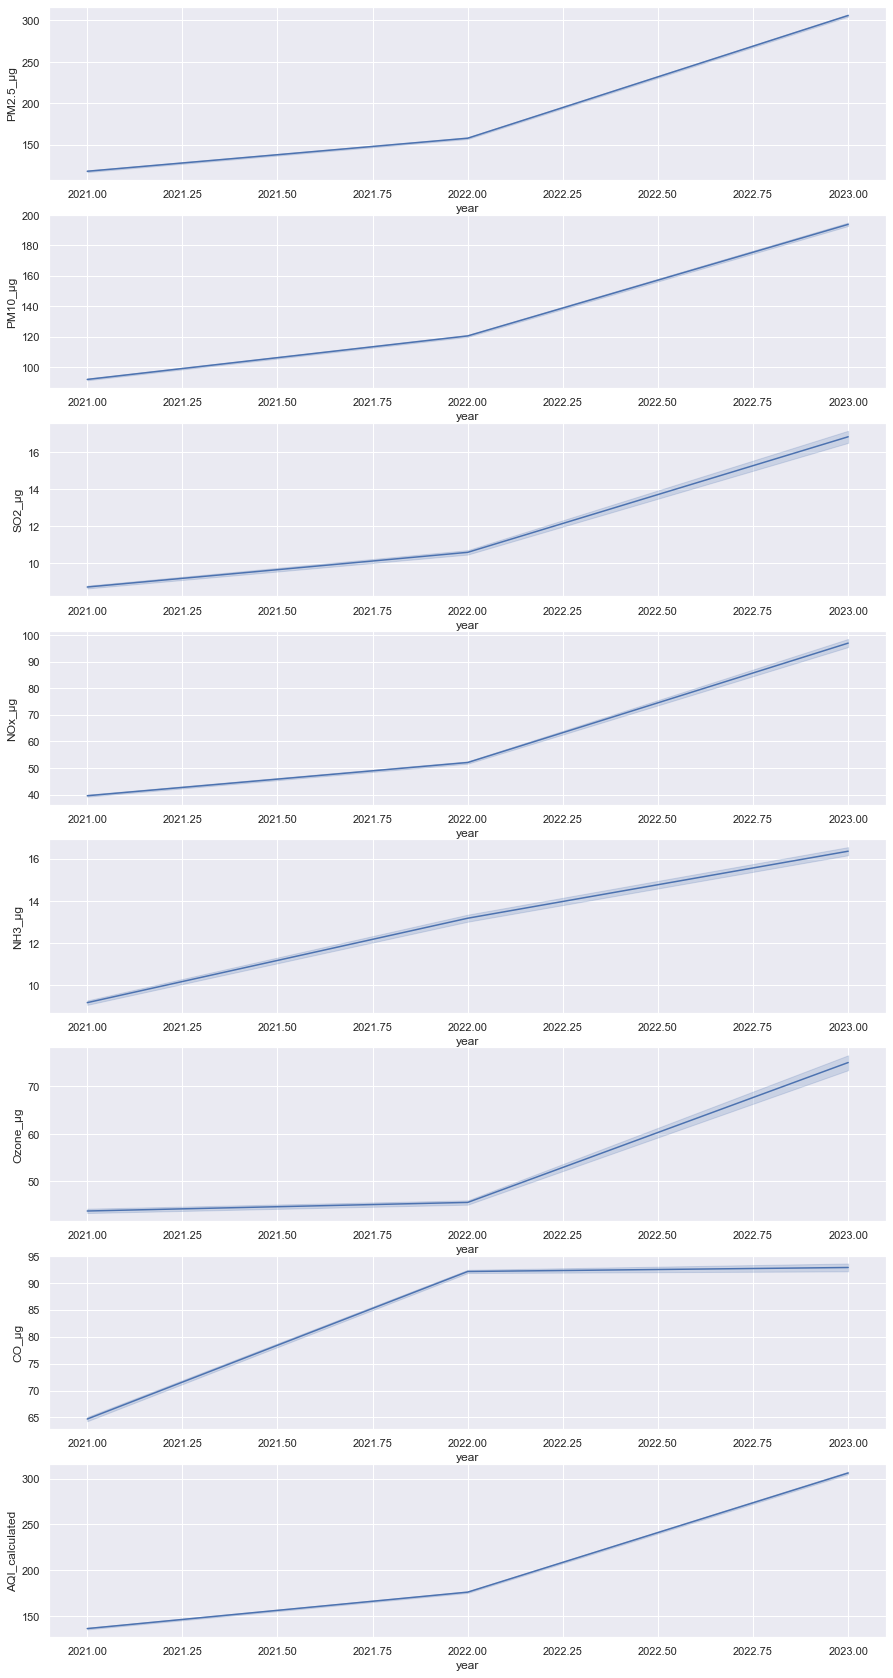

In [113]:
lineplot_year_pollutant(df_year_pollutant)

#### Insights
- Concentration of PM2.5 and PM10 is increased 66% and 100% 2022 to 2023 while during lockdown (2021) there was approx 50% increase 
- Conc of CO is flatten in 2022-23.
- Ozone concentration increased 75% from 2022 to 2023 while we did not observe any change in NH3 concentration. 

##### Need to see the seasonality of AQI month wise(w.r.t year) 

In [114]:
def lineplot_month_pollutant(data):
    plt.figure(figsize=(15,30))
    
    columns=['PM2.5_μg', 'PM10_μg', 'SO2_μg', 'NOx_μg', 
             'NH3_μg','Ozone_μg', 'CO_μg', 'AQI_calculated']
    for i, column in enumerate(columns):
        plt.subplot(8, 1, i+1)
#         fig, ax = plt.subplots(figsize=(15, 5))
 
        # drawing the plot
        # Plot the responses for different events and regions

        sns.lineplot(x="month", y=column, data=df_year_pollutant[229159:305479])

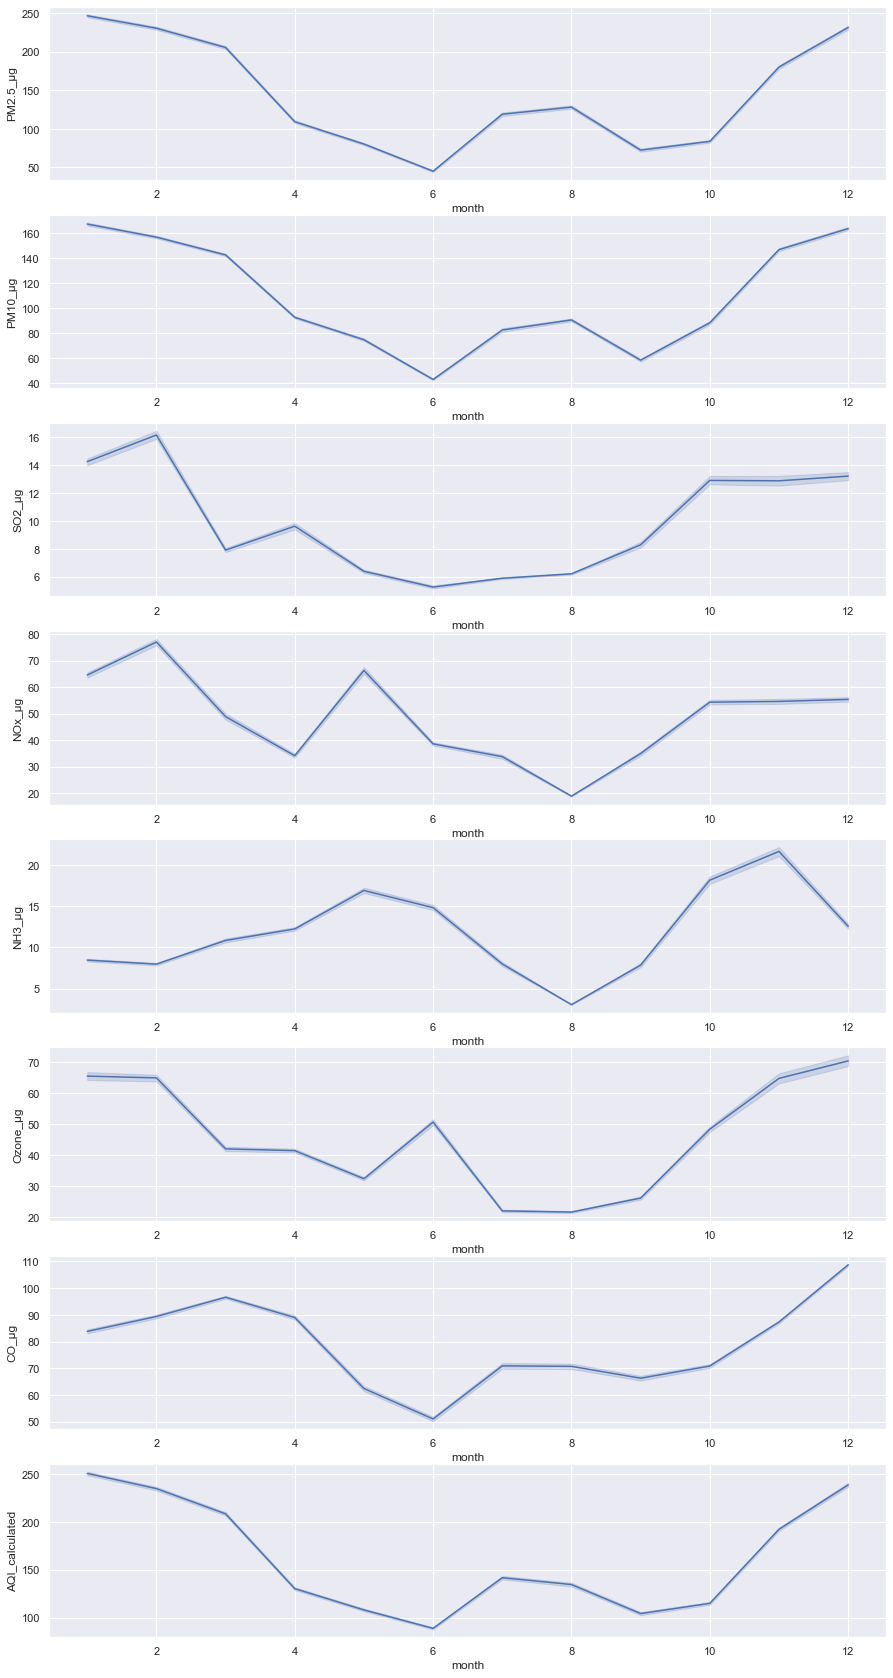

In [115]:
lineplot_month_pollutant(df_year_pollutant)

#### Insights
- From Jan to June conc of pollutants is decreasing hence we can observe AQI is also decresing.
- While from July to Dec conc of pollutants is in increasing trend.

In [162]:
def barplot_month_pollutant(data):
    plt.figure(figsize=(15,30))
    
    columns=['PM2.5_μg', 'PM10_μg', 'SO2_μg', 'NOx_μg', 
             'NH3_μg','Ozone_μg', 'CO_μg', 'AQI_calculated']
    
    for i, column in enumerate(columns):
        plt.subplot(8, 1, i+1)
        sns.barplot('month',column,data=df_year_pollutant[229159:305479])

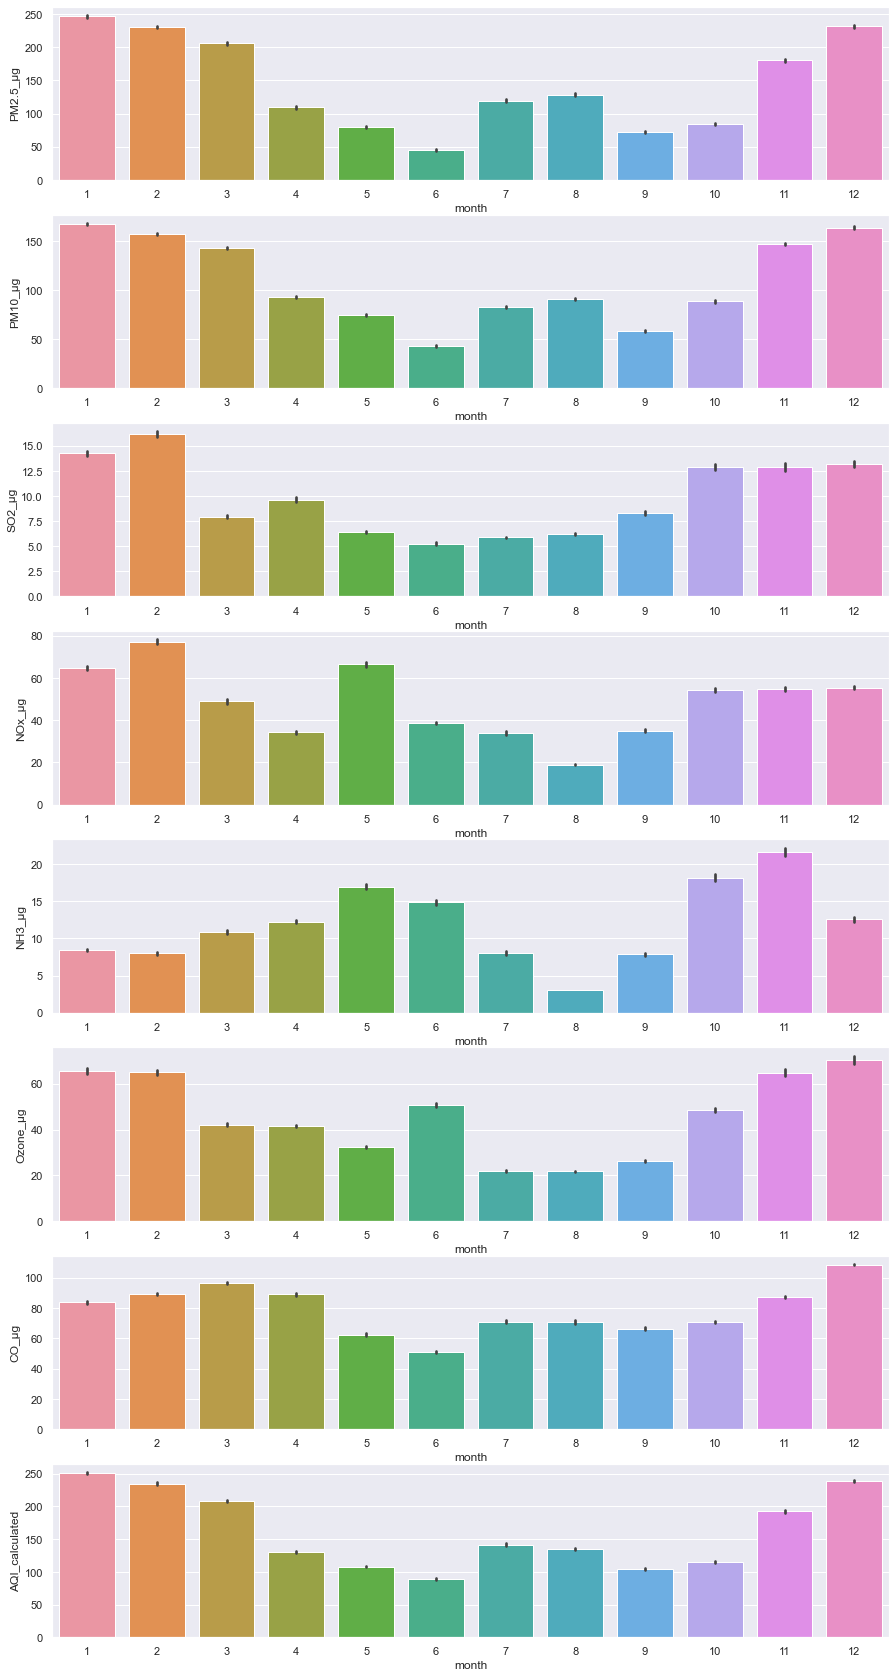

In [163]:
barplot_month_pollutant(df_year_pollutant)

In [147]:
plt.rcParams['figure.figsize'] = [10, 8]

<AxesSubplot: ylabel='PM2.5_μg'>

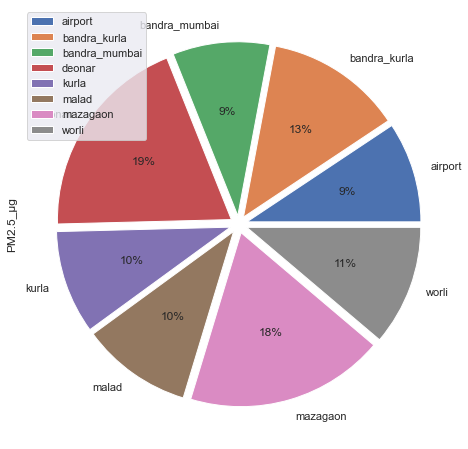

In [148]:
df.groupby(['station']).sum().plot(kind='pie', y='PM2.5_μg',autopct='%1.0f%%', explode=explode)

<AxesSubplot: ylabel='PM10_μg'>

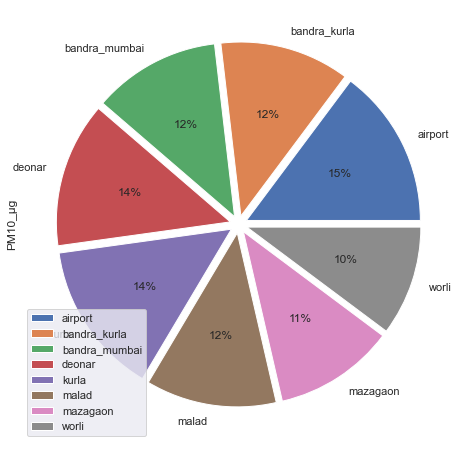

In [149]:
df.groupby(['station']).sum().plot(kind='pie', y='PM10_μg',autopct='%1.0f%%', explode=explode)

<AxesSubplot: ylabel='Ozone_μg'>

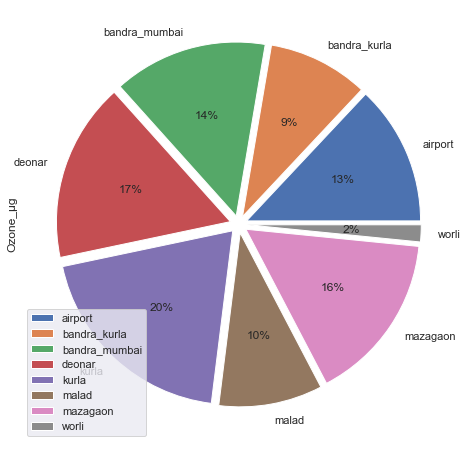

In [150]:
df.groupby(['station']).sum().plot(kind='pie', y='Ozone_μg',autopct='%1.0f%%', explode=explode)

<AxesSubplot: ylabel='NOx_μg'>

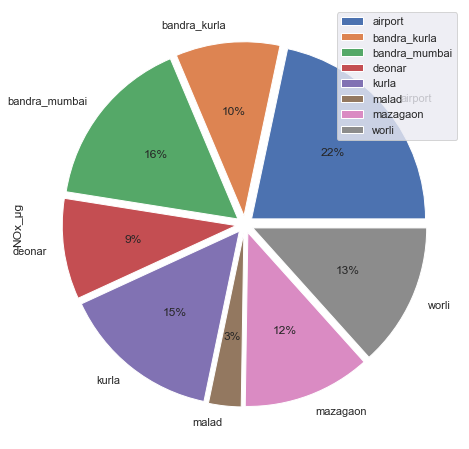

In [151]:
df.groupby(['station']).sum().plot(kind='pie', y='NOx_μg',autopct='%1.0f%%', explode=explode)

#### Insights:
- PM2.5 is majorly impacting Deonar, Mazagaon stations. 
- PM10 is impacting Airport, Deonar and Kurla stations
- While NOx is majorly impacting the air pollution in Airport, Kurla and Bandra_Mumbai stations

### Summary of Data Exploration and Visualization:

- 8 Stations are included (based on different articles stating pollution levels in Mumbai) in AQI study for Mumbai (Bandra_kurla, Mazagaon, Bandra_mumbai, Airport, Deonar, Kurla, Malad, Worli)
- 25-40% of data were missing in the columns which is imputed using KNN Imputer and other columns were dropped (if the columns have more than 50% NULL)
- AQI is calculated using independent variables.

- 'PM2.5_μg','PM10_μg' and 'NOx_μg' is showing strong positive correlation with AQI.
- Deonar and Mazagaon are highest polluted stations, while Airport, Bandra_kurla, Kurla and Worli are emerging as polluted stations.
- Concentration of PM2.5 and PM10 is increased 66% and 100% 2022 to 2023 while during lockdown (2021) there was approx 50% increase
- Ozone concentration increased 75% from 2022 to 2023 while we did not observe any change in NH3 concentration.

- From Jan to June conc of pollutants is decreasing hence we can observe AQI is also decresing.
- While from July to Dec conc of pollutants is in increasing trend.

- PM2.5 is majorly impacting Deonar, Mazagaon stations.
- PM10 is impacting Airport, Deonar and Kurla stations
- While NOx is majorly impacting the air pollution in Airport, Kurla and Bandra_Mumbai stations


## Happy Reading 